In [1]:
rm -rf sample_data/

In [2]:
pwd

'/content'

#### upload wheat_bangalore.csv to /content folder

In [4]:
ls

Wheat_Bangalore.csv


In [6]:
pip install statsmodels --upgrade

     |████████████████████████████████| 9.5MB 5.5MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
from pandas import datetime, read_csv, DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [3]:
# date format in data
dateparser = lambda x: datetime.strptime(x, '%Y-%m-%d')

In [11]:
# read data from csv file
series = read_csv('Wheat_Bangalore.csv', usecols=['Date','MeanPrice(Rs./Quintal)'], index_col=0, parse_dates=True, date_parser=dateparser, squeeze=True)
series

Date
2002-01-01    1100
2002-06-01    1200
2002-07-01    1184
2002-08-01    1176
2002-11-01    1150
              ... 
2019-06-01    2900
2019-07-01    2900
2019-08-01    2900
2019-11-01    3014
2019-12-01    2700
Name: MeanPrice(Rs./Quintal), Length: 106, dtype: int64

In [12]:
series.index = series.index.to_period('d')

In [17]:
# divide into test and train
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
print(series)

Date
2002-01-01    1100
2002-06-01    1200
2002-07-01    1184
2002-08-01    1176
2002-11-01    1150
              ... 
2019-06-01    2900
2019-07-01    2900
2019-08-01    2900
2019-11-01    3014
2019-12-01    2700
Freq: D, Name: MeanPrice(Rs./Quintal), Length: 106, dtype: int64


In [18]:
# For a non-differenced series, 
# the number of lags for AR = 9 (from ACF)
# number of lags for MA = 1 (from PACF)
# check "undertanding timeseries Data.ipynb"
model = ARIMA(train, order = (9,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   98
Model:                 ARIMA(9, 0, 1)   Log Likelihood                -619.034
Date:                Sat, 27 Feb 2021   AIC                           1262.067
Time:                        12:26:20   BIC                           1293.087
Sample:                             0   HQIC                          1274.614
                                 - 98                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1920.4887    600.692      3.197      0.001     743.154    3097.824
ar.L1          0.3570      1.950      0.183      0.855      -3.465       4.179
ar.L2          0.4230      1.483      0.285      0.7

In [19]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

for i in range(len(predictions)):
  print("predicted=%f, expected=%f"%(predictions[i],test[i]))

predicted=2737.151554, expected=2750.000000
predicted=2675.345511, expected=2750.000000
predicted=2705.602361, expected=2900.000000
predicted=2683.281093, expected=2900.000000
predicted=2679.332954, expected=2900.000000
predicted=2670.138354, expected=3014.000000
predicted=2653.878128, expected=2700.000000


In [20]:
# error calculations
rmse = sqrt(mean_squared_error(test, predictions))
print(f"RMSE: {rmse}")

RMSE: 192.5609014970066


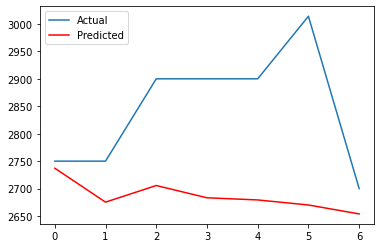

In [21]:
# plot actual values and predicted values
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()